In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import mglearn
%matplotlib inline

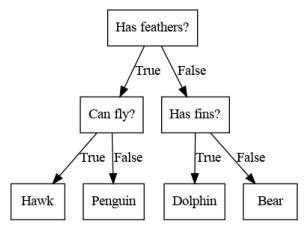

In [2]:
mglearn.plots.plot_animal_tree()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,                   cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
print('Training Score: {:.3f}'.format(tree.score(X_train,y_train)))
print('Testing Score: {:.3f}'.format(tree.score(X_test,y_test)))
print('\n\n')
treeMaxDepth=DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)
print('Training Score Max Depth = 4: {:.3f}'.format(treeMaxDepth.score(X_train,y_train)))
print('Testing Score Max Depth = 4: {:.3f}'.format(treeMaxDepth.score(X_test,y_test)))

Training Score: 1.000
Testing Score: 0.937



Training Score Max Depth = 4: 0.988
Testing Score Max Depth = 4: 0.951


In [4]:
from sklearn.tree import export_graphviz
export_graphviz(treeMaxDepth,out_file="tree.dot",class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

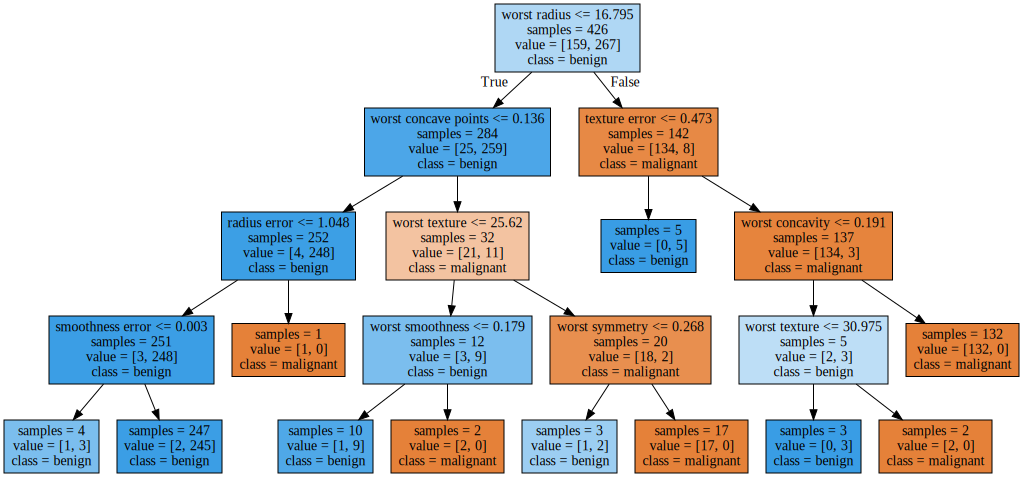

In [5]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [6]:
print("Feature importances:\n{}".format(treeMaxDepth.feature_importances_))


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


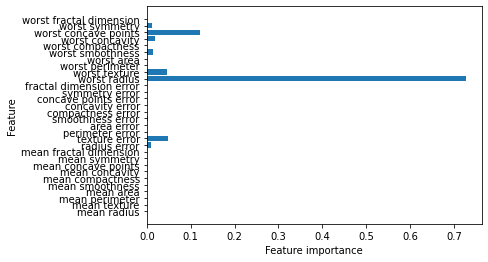

In [7]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(treeMaxDepth)

Feature importances: [0. 1.]


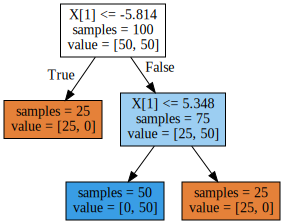

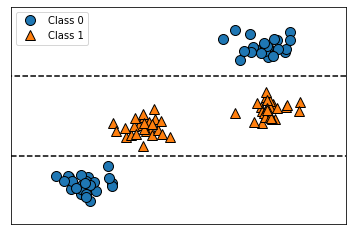

In [8]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

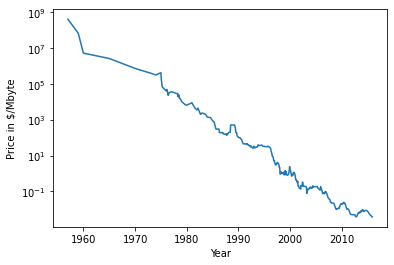

In [9]:
ram_prices=pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()

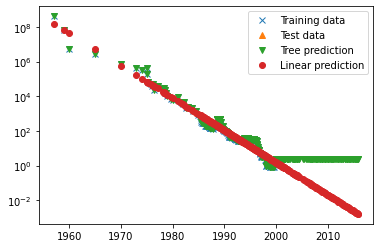

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices>2000]

# predict prices based on date
X_train=data_train.date[:,np.newaxis]
#we use a log transform of a price to get a simple relationship of data to the target
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

# predict on all data
X_all=ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

#undo log-transform
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data",marker='x',lw=0)
plt.semilogy(data_test.date, data_test.price, label="Test data",marker='^',lw=0)
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction",marker='v',lw=0)
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction",marker='o',lw=0)
plt.legend()
plt.show()
